Признаки дата-сета:

* country — страна-производитель вина.

* description — подробное описание.

* designation — название виноградника, где выращивают виноград для вина.

* points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.

* price — стоимость бутылки вина.

* province — провинция или штат.

* region_1 — винодельческий район в провинции или штате (например Напа).

* region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.

* taster_name — имя сомелье.

* taster_twitter_handle — твиттер сомелье.

* title — название вина, которое часто содержит год и другую подробную информацию.

* variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).

* winery — винодельня, которая производила вино.

In [161]:
import pandas as pd
import seaborn as sns
import statistics # библиотека для статистических расчетов
import matplotlib.pyplot as plt
import category_encoders as ce # библиотека для работы с категориальными признаками
from scipy import stats # библиотека для расчетов
from sklearn.metrics import matthews_corrcoef # отдельная библиотека в которой есть корреляция Мэтьюса

# !Данная библиотека используется только для того, чтобы не выводить разные предупреждения и не используется для расчетов!
import warnings
warnings.filterwarnings('ignore')

In [162]:
wine_df = pd.read_csv('Data/wine_cleared.csv')
display(wine_df.head(5))
display()
display(wine_df.tail(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [163]:
# Создадим новый числовой признак с округленной ценой за бутылку вина
wine_df['price_round'] = wine_df['price'].round().astype(int)

In [164]:
display(wine_df.head(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65


In [165]:
# Выражение для поиска числа (четырехзначное)
regex = '\d{4}'

# Создадим новый числовой признак с датой создания вина
wine_df['year'] = wine_df['title'].str.findall(regex).str.get(0)

In [166]:
display(wine_df.head(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


In [167]:
# Создадим новый категориальный признак произведено ли вино в США, т.к. эта страна самая распространенная в датасете
wine_df['is_usa'] = wine_df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [168]:
display(wine_df.head(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1


In [169]:
# Две самые распространенные страны-производители кроме США
exclude_usa = wine_df[wine_df['is_usa'] != 1]
most_pop = exclude_usa['country'].value_counts().nlargest(2)
print(f'Самые популярные страны-производители вина (помимо США): {most_pop}')

Самые популярные страны-производители вина (помимо США): country
France    22093
Italy     19540
Name: count, dtype: int64


In [170]:
# Создадим новый категориальный признак произведено ли вино во Франции, т.к. эта страна занимает второе место в датасете
wine_df['is_france'] = wine_df['country'].apply(lambda x: 1 if x == 'France' else 0)

In [171]:
# Создадим новый категориальный признак произведено ли вино в Италии, т.к. эта страна занимает третье место в датасете
wine_df['is_italy'] = wine_df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [172]:
display(f'Количество стран-производителей Франция: {wine_df['is_france'].sum()}')

'Количество стран-производителей Франция: 22093'

In [173]:
display(f'Количество стран-производителей Италия: {wine_df['is_italy'].sum()}')

'Количество стран-производителей Италия: 19540'

In [174]:
# Преобразуем признак year в формат date, поскольку этот признак изначально object (errors='coerce' игнорируем ошибки)
wine_df['year'] = pd.to_datetime(wine_df['year'], errors='coerce')
display(wine_df)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004-01-01,1,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0


In [175]:
# Создадим новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года
wine_df['old_wine'] = wine_df['year'].apply(lambda x: 1 if x.year < 2010 else 0)

In [176]:
display(f'Количество старых вин (старше 2010 года): {wine_df['old_wine'].sum()}')

'Количество старых вин (старше 2010 года): 39765'

In [177]:
# Создадим новый признак locality
regex = r'\((.*?)\)'

wine_df['locality'] = wine_df['title'].str.findall(regex).str.get(0)
display(wine_df.head(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley


In [178]:
# Файл с данными и населении стран
population_df = pd.read_csv('Data/country_population.csv', sep=';')
request = population_df['country'] == 'Italy'

print(population_df[request])

   country  population
24   Italy  59,097,904


In [179]:
# Создади новый признак population_country на основе внешнего источника (нашего другого дата-сета)
wine_df = wine_df.join(population_df.set_index('country'), on='country')

In [180]:
# Файл с данными и площади стран
area_df = pd.read_csv('Data/country_area.csv', sep=';')
print(area_df)

          country         area
0          Russia  17075400.00
1          Canada   9984670.00
2           China   9596960.00
3              US   9372610.00
4          Brazil   8547000.00
..            ...          ...
188    San Marino        61.00
189        Tuvalu        26.00
190         Nauru        21.00
191        Monaco         2.00
192  Vatican City         0.44

[193 rows x 2 columns]


In [181]:
# Создадим новый признак area_country на основании внешнего источника данных
wine_df = wine_df.join(area_df.set_index('country'), on='country')

In [182]:
display(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  object   

None

In [183]:
# Переименовываем признаки для удобства прочтения
wine_df = wine_df.rename(columns={'population': 'population_country'})
wine_df = wine_df.rename(columns={'area': 'area_country'})

In [184]:
# Население страны по названию вина где оно производится
wine_name = 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'
request = wine_df['title'] == wine_name
area = wine_df[request].loc[94, 'area_country']
display(round(float(area)))

9372610

## РАБОТА С ФОРМАТОМ ДАТА-ВРЕМЯ

Для практики будет использоваться ручной дата-сет:

* client_id — идентификатор клиента в базе;

* agent_date — время соединения с агентом;

* created_at — время соединения с клиентом (начало разговора);

* end_date — время окончания соединения с клиентом (конец разговора).


In [185]:
# инициализируем информацию о звонках

calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

In [186]:
# Прочитаем данные
calls_df = calls
display(calls_df)

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [187]:
# Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 
# Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка. Расчет в секундах
calls_df['duration'] = (calls_df['end_date'] - calls_df['created_at']).dt.seconds

display(calls_df)

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [188]:
# Подсчитаем, сколько секунд тратят сотрудники компании на дозвон клиенту. 
# Создаем новый признак time_connection в секундах
calls_df['time_connection'] = (calls_df['created_at'] - calls_df['agent_date']).dt.seconds

display(f'Общее время использованное на дозвон: {calls_df['time_connection'].sum()}')

'Общее время использованное на дозвон: 89'

In [189]:
# Создаем новый бинарный признак is_connection — факт соединения с клиентом.
# Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.
calls_df['is_connection'] = calls_df['duration'].apply(lambda x: 1 if x > 10 else 0)

display(f'Общее время использованное на разговор с клиентами: {calls_df['is_connection'].sum()}')

'Общее время использованное на разговор с клиентами: 7'

In [190]:
# Создаем новый признак time_diff — разницу в секундах между началом звонка (не разговора) и его окончанием.
calls_df['time_diff'] = (calls_df['end_date'] - calls_df['agent_date']).dt.seconds

display(f'Общая разница между началом звонка и его окончанием: {calls_df['time_diff'].sum()}')

'Общая разница между началом звонка и его окончанием: 1144'

In [191]:
# Поскольку три старых признака мы не сможем передать в модель их наличие бессмысленно, удаляем лишние признаки
calls_df = calls_df.drop(columns = ['agent_date', 'created_at' ,'end_date'], axis=1)
display(calls_df)

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


Теперь перейдем обратно к винному дата-сету!

In [192]:
display(wine_df.head(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population_country,area_country
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0


In [193]:
# Создаем новый признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. 
# За дату отсчёта берем 12 января 2022 года. 

start_date = pd.to_datetime('2022-01-12') # '12-01-2022' --> '2022-01-12'

wine_df['years_diff'] = (start_date - wine_df['year']).dt.days
display(f'Максимальное количество дней с момента произведения вина: {round(wine_df['years_diff'].max())}')

'Максимальное количество дней с момента произведения вина: 98627'

## Работа с категориальными признаками (пример)

In [194]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [195]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
    'col':'size', 
    'mapping': {'xxs': 1, 'xs': 2, 's': 3, 'm': 4, 'l': 5, 'xxl': 6}
    }])

# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])

# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)
display(clothing)

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак size — размер одежды со значениями xxs, xs, s соответственно в значения 1, 2, 3. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: xxs меньше xs, и числовой код 1 (xxs) меньше, чем числовой код 2 (xs).

In [196]:
# Посмотрим для начала какие года-категории есть в нашем дата-сете в признаке year

display(wine_df['year'].unique())

<DatetimeArray>
['2013-01-01 00:00:00', '2011-01-01 00:00:00', '2012-01-01 00:00:00',
 '2010-01-01 00:00:00', '2007-01-01 00:00:00', '2009-01-01 00:00:00',
 '2008-01-01 00:00:00', '2014-01-01 00:00:00', '2015-01-01 00:00:00',
                 'NaT', '2016-01-01 00:00:00', '2004-01-01 00:00:00',
 '2003-01-01 00:00:00', '2006-01-01 00:00:00', '2001-01-01 00:00:00',
 '2005-01-01 00:00:00', '2002-01-01 00:00:00', '1887-01-01 00:00:00',
 '2000-01-01 00:00:00', '1999-01-01 00:00:00', '1991-01-01 00:00:00',
 '1997-01-01 00:00:00', '1996-01-01 00:00:00', '1877-01-01 00:00:00',
 '2017-01-01 00:00:00', '1995-01-01 00:00:00', '1872-01-01 00:00:00',
 '1868-01-01 00:00:00', '1898-01-01 00:00:00', '1998-01-01 00:00:00',
 '1852-01-01 00:00:00', '1994-01-01 00:00:00', '1992-01-01 00:00:00',
 '1840-01-01 00:00:00', '1929-01-01 00:00:00', '1912-01-01 00:00:00',
 '1875-01-01 00:00:00', '1976-01-01 00:00:00', '1964-01-01 00:00:00',
 '1848-01-01 00:00:00', '1870-01-01 00:00:00', '1856-01-01 00:00:00',
 '19

In [197]:
# Закодируем порядковым кодированием year в нашем дата-сете wine_df

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(wine_df['year'])

wine_df = wine_df.assign(year_encoded=data_bin)
display(wine_df.head(2))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population_country,area_country,years_diff,year_encoded
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2011-01-01


Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [198]:
# создаем объект OneHotEncoding, указываем столбец для кодирования
# return_df=True возвращает преобразованный фрейм данных
# позволяет возвращать имена переменных вместе с категориями в качестве названий новых бинарных переменных
ord_encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True, return_df=True)

data_bin = ord_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, data_bin], axis=1)
display(clothing)

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Таким образом, мы получили четыре новых признака для категорий coat, dress, shirt, skirt. В строке нужного типа исходного признака стоит значение 1, в остальных строках — 0. Эти признаки пригодны для обучения.

In [199]:
# Посмотрим для начала, сколько мы получим новых признаков
display(wine_df['taster_name'].unique())

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', 'unknown', 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [200]:
# Закодируем признак taster_name, т.к этот признак является номинальным, с помощью OneHotEncoder
encoder = ce.OneHotEncoder(cols=['taster_name'])

encoded_data = encoder.fit_transform(wine_df['taster_name'])

wine_df = pd.concat([wine_df, encoded_data], axis=1)
display(wine_df.info())
display(f'Количество новых колонок с закодированными признаками: {wine_df['taster_name'].nunique()}')

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  object   

None

'Количество новых колонок с закодированными признаками: 20'

Закодируем бинарным способом признак type в дата-сете одежды. Используем класс BinaryEncoder библиотеки category_encoders.

In [201]:
# Закодируем признак type c помощью BinaryEncoder
encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования

encoded_data = encoder.fit_transform(clothing['type'])

clothing = pd.concat([clothing, encoded_data], axis=1)
display(clothing)

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [202]:
# Посчитаем количество признаков до "бинарной операции"
signs_count_before = wine_df.shape[1]
display(signs_count_before)

44

Теперь перейдем к нашему дата-сету винных обзоров и закодируем признак country бинарным способом, т.к. уникальных значений там больше 15

In [203]:
# Закодируем признак country бинарным способом
encoder = ce.BinaryEncoder(cols=['country'])

encoded_data = encoder.fit_transform(wine_df['country'])

# Присоединяем новые признаки к дата-сету
wine_df = pd.concat([wine_df, encoded_data], axis=1)

In [204]:
display(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  object   

None

In [205]:
display(f'Количество новых признаков после BinaryEncoded: {wine_df.shape[1] - signs_count_before}')

'Количество новых признаков после BinaryEncoded: 6'

In [206]:
# Посчитаем количество признаков до "Binary encoder"
signs_count_before = wine_df.shape[1]
display(signs_count_before)

50

In [207]:
# Закодируем признак taster_twitter_handle в binary encoder т.к признаков более 15
encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])

encoded_data = encoder.fit_transform(wine_df['taster_twitter_handle'])

wine_df = pd.concat([wine_df, encoded_data], axis=1)

In [208]:
display(f'Количество новых признаков после BinaryEncoded: {wine_df.shape[1] - signs_count_before}')

'Количество новых признаков после BinaryEncoded: 5'

Еще один новый пример для тренировки! Определить какой признак к какому типу относится и закодировать их в соответствии с их типом

In [209]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
display(df)

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [210]:
# Таким образом payment_type - номинальный тип (кодируем OneHotEncoding т.к. до 15 значений), т.к карты не имеют естественного порядка
encoder = ce.OneHotEncoder(cols=['payment_type'])
encoded_data = encoder.fit_transform(df['payment_type'])

df = pd.concat([df, encoded_data], axis=1)
display(df)

,product,price,payment_type,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0
1,Product2,3600,Visa,0,1,0
2,Product3,7500,Amex,0,0,1


In [211]:
# Признак product скорее всего номинальный т.к название продукта может содержать много уникальных значений 
# (кодируем OneHotEncoding т.к. до 15 значений)
encoder = ce.OneHotEncoder(cols=['product'])
encoded_data = encoder.fit_transform(df['product'])

df = pd.concat([df, encoded_data], axis=1)
display(df)

,product,price,payment_type,payment_type_1,payment_type_2,payment_type_3,product_1,product_2,product_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


Этот код, выполняет обучающий набор различных распределений:

In [212]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
stat_test_df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

* Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.

* Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.

* Нормальное распределение, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации _kdeplot()_ — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности.

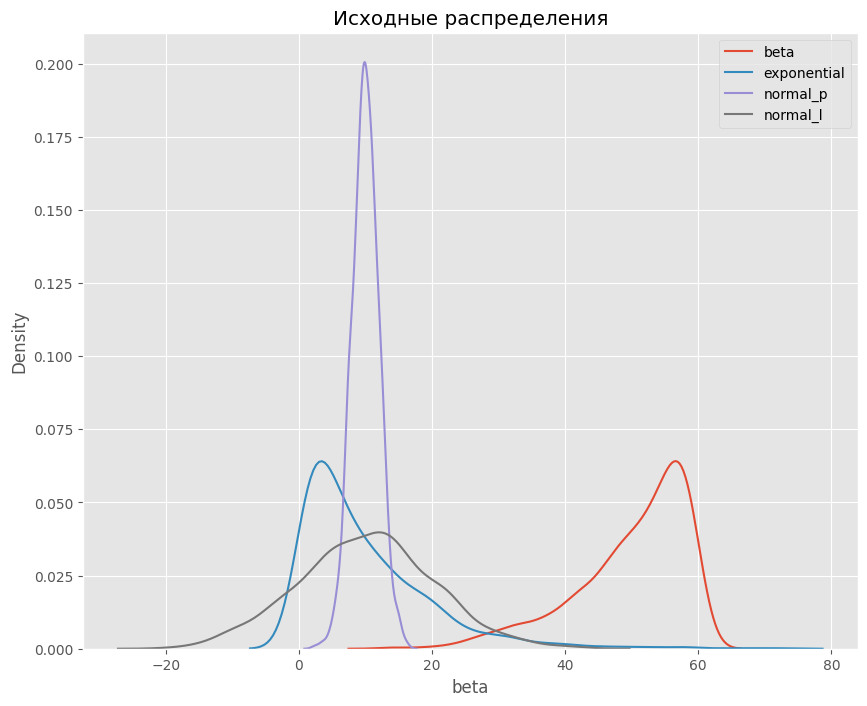

In [213]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(stat_test_df['beta'], ax=ax1, label ='beta')
sns.kdeplot(stat_test_df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(stat_test_df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(stat_test_df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [214]:
# Зафиксируем описательные статистики
display(stat_test_df.describe())
display(stat_test_df.head(5))

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664


In [215]:
# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(stat_test_df.columns)

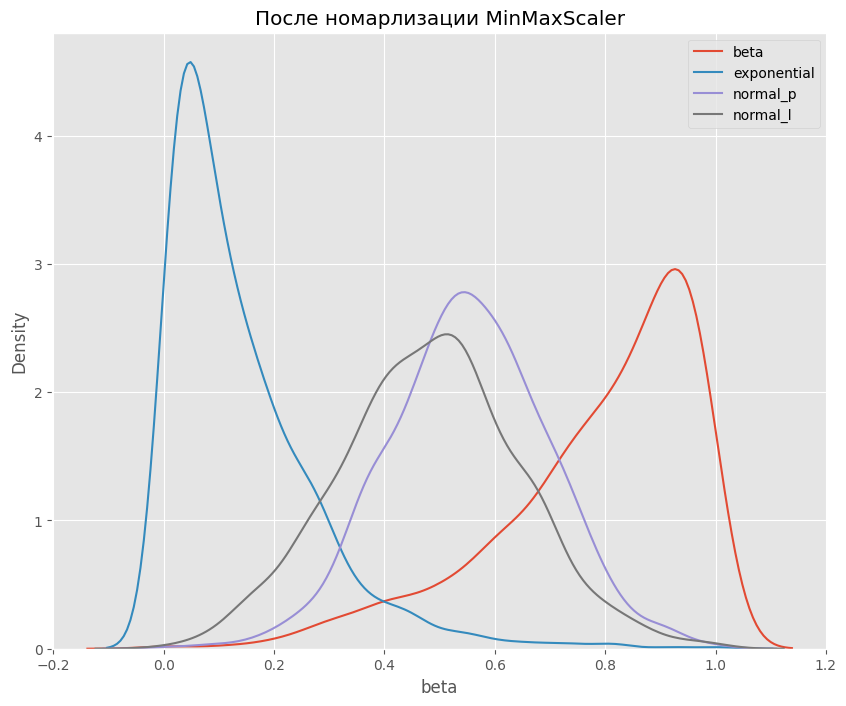

In [216]:
# Проведем нормализацию распределений с помощью MinMaxScaler библиотеки sklearn

# инициализируем нормализатор MinMaxScaler
mm_skaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_skaler.fit_transform(stat_test_df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После номарлизации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_mm['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_mm['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_mm['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [217]:
display(df_mm.describe())
display(df_mm.head(5))

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


,beta,exponential,normal_p,normal_l
0,0.550966,0.031628,0.685794,0.394206
1,0.892488,0.183650,0.681200,0.495012
2,0.727853,0.046321,0.634320,0.380752
3,0.635493,0.247512,0.426472,1.000000
4,0.689852,0.029468,0.198891,0.592419


<Axes: title={'center': 'После номарлизации RobustScaler'}, xlabel='beta', ylabel='Density'>

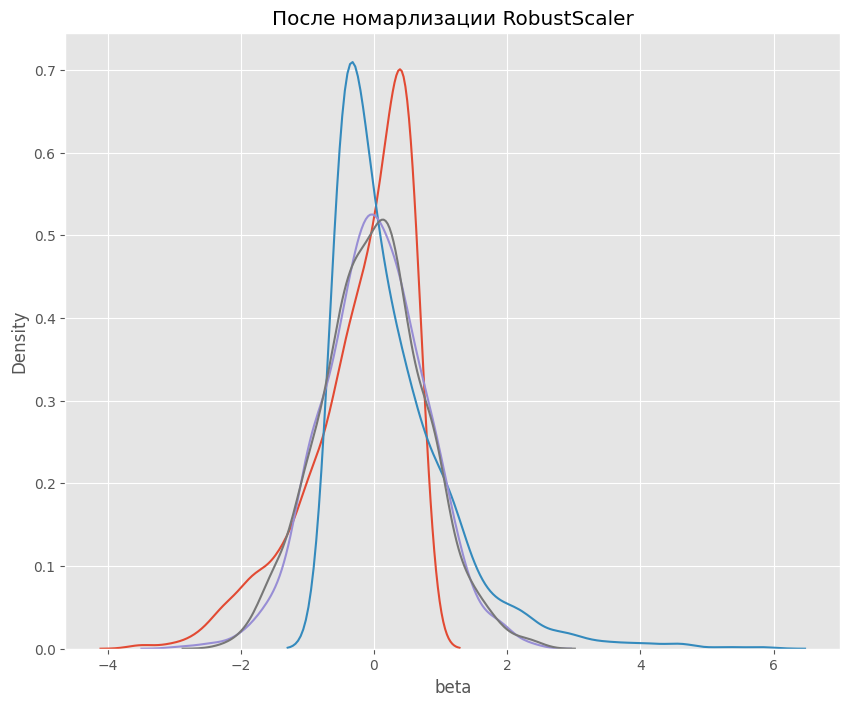

In [218]:
# Инициируем нормализатор
scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
scaled_data = scaler.fit_transform(stat_test_df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(scaled_data, columns=col_names)

# Построим график
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После номарлизации RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_r['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_r['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_r['normal_l'], ax=ax1, label ='normal_l')

In [219]:
display(df_r.describe())
display(df_r.head(5))

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


,beta,exponential,normal_p,normal_l
0,-1.195340,-0.429469,0.716470,-0.427500
1,0.246401,0.550085,0.692166,0.048500
2,-0.448610,-0.334796,0.444160,-0.491032
3,-0.838507,0.961582,-0.655412,2.433017
4,-0.609033,-0.443391,-1.859376,0.508447


Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

Продолжим использовать обучающий пример с дата-фреймом - stat_test_df. Стандартизируем признаки в исходном наборе данных используя метод StandardScaler().

<Axes: title={'center': 'После номарлизации StandardScaler'}, xlabel='beta', ylabel='Density'>

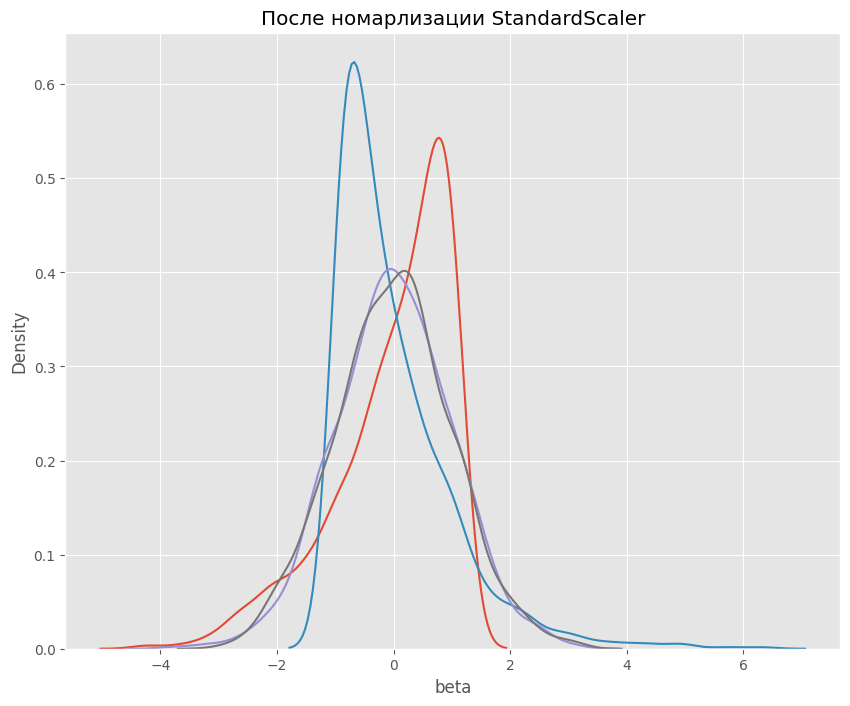

In [220]:
# инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
scaled_data = scaler.fit_transform(stat_test_df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(scaled_data, columns=col_names)

# Построим график
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После номарлизации StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_s['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_s['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_s['normal_l'], ax=ax1, label ='normal_l')

In [221]:
display(df_s.describe())
display(df_s.head(5))

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


,beta,exponential,normal_p,normal_l
0,-1.269200,-0.798073,0.927110,-0.537436
1,0.591023,0.316598,0.895484,0.077575
2,-0.305723,-0.690341,0.572757,-0.619522
3,-0.808792,0.784856,-0.858096,3.158464
4,-0.512709,-0.813915,-2.424794,0.671844


Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более нормальными.

Теперь снова перейдем к нашему дата-сету wine_df и проведем операции стандартизации и нормализации данных

In [222]:
# Стандартизируем признак price с помощью StandardScaler
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(wine_df[['price']])
wine_df['price'] = scaled_data

In [223]:
display(round(wine_df['price'][129968], 2))

-0.14

0         0.000003
1        -0.514525
2        -0.539793
3        -0.565060
4         0.748842
            ...   
129966   -0.186050
129967    1.001515
129968   -0.135515
129969   -0.084981
129970   -0.362921
Name: price, Length: 129972, dtype: float64

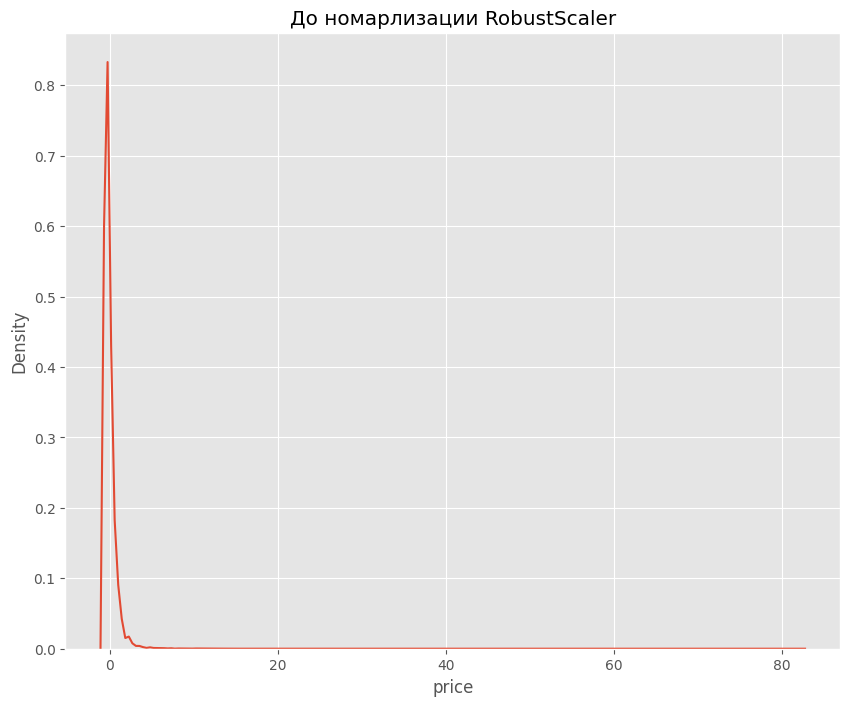

In [224]:
# Построим график
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('До номарлизации RobustScaler')
sns.kdeplot(wine_df['price'], ax=ax1, label ='price')
display(wine_df['price'])

In [225]:
# Нормализуем признак price c помощью RobustScaler т.к в этих данных есть выбросы
scaler = preprocessing.RobustScaler()
scaled_data = scaler.fit_transform(wine_df[['price']])
wine_df['price'] = scaled_data

0         0.334700
1        -0.590909
2        -0.636364
3        -0.681818
4         1.681818
            ...   
129966    0.000000
129967    2.136364
129968    0.090909
129969    0.181818
129970   -0.318182
Name: price, Length: 129972, dtype: float64

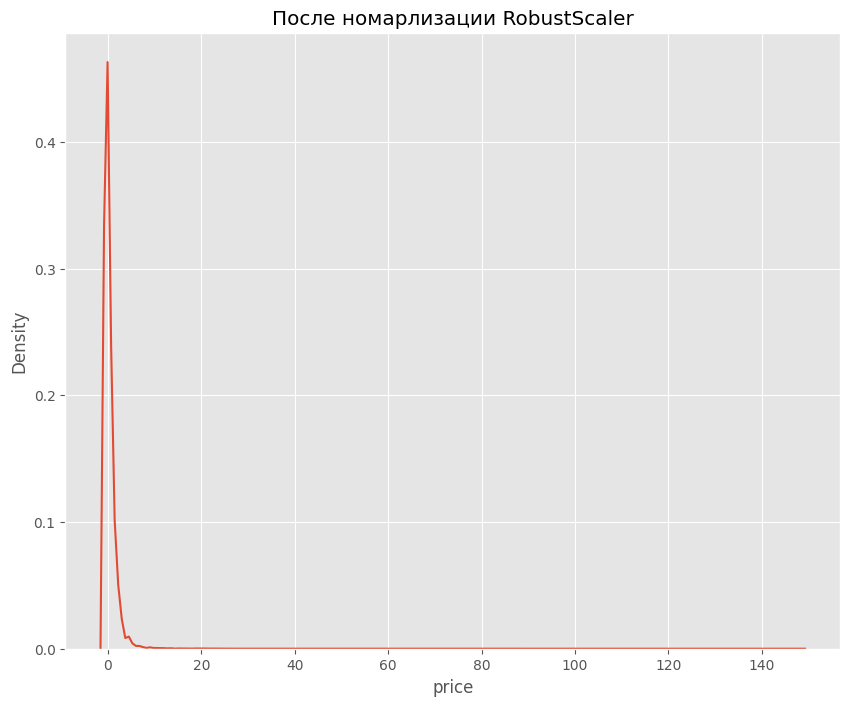

In [226]:
# Построим график
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После номарлизации RobustScaler')
sns.kdeplot(wine_df['price'], ax=ax1, label ='price')
display(wine_df['price'])

In [227]:
display(round(wine_df['price'].sum()))

43501

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal length — длина наружной доли околоцветника;

* sepal width — ширина наружной доли околоцветника;

* petal length — длина внутренней доли околоцветника;

* petal width — ширина внутренней доли околоцветника.

In [228]:
# Прочитаем наш дата-сет с ирисами
iris_df = pd.read_csv('Data/iris.csv')
display(iris_df.head(10))

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<Axes: >

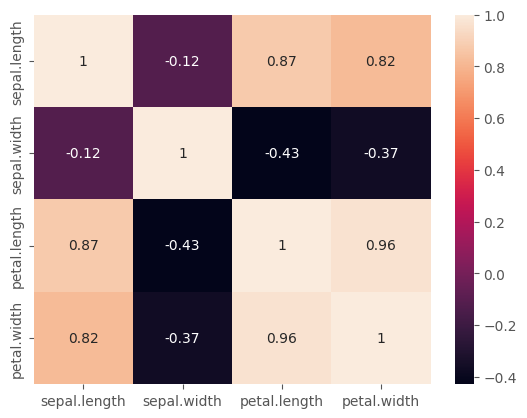

In [229]:
# Корреляционный анализ дата-сета
sns.heatmap(data=iris_df.corr(numeric_only=True), annot=True)

In [230]:
# Удалим признаки с мультиколлинеарностью (+/- больше 0.7). Такими признаками являются три пары: 
# - sepal.length и petal.width, 
# - petal.length и sepal.length,
# - petal.width и petal.length

# Удаляем
iris_df = iris_df.drop('petal.width', axis=1) # Самая высокая корреляция: 0.96
iris_df = iris_df.drop('petal.length', axis=1) # 0.87

In [231]:
display(iris_df)

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


<Axes: >

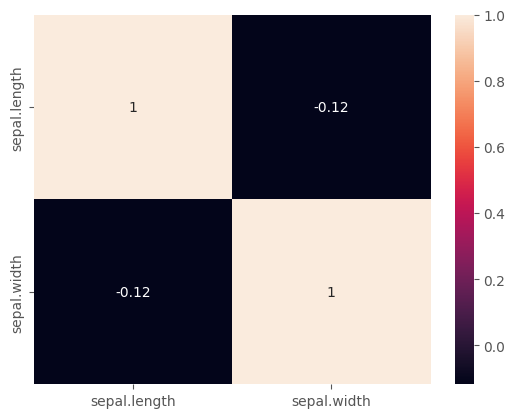

In [232]:
# Корреляционный анализ дата-сета
sns.heatmap(data=iris_df.corr(numeric_only=True), annot=True)

У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Это означает, что всего два признака — sepal length (длина наружной доли околоцветника) и sepal width (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки petal length (длина внутренней доли околоцветника) и petal width (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

In [233]:
display(wine_df.info())

display(wine_df.describe())

display(wine_df.head(10))

display(wine_df.tail(10))

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               129972 non-null  int64         
 1   country                  129909 non-null  object        
 2   description              129972 non-null  object        
 3   designation              129972 non-null  object        
 4   points                   129972 non-null  int64         
 5   price                    129972 non-null  float64       
 6   province                 129909 non-null  object        
 7   region_1                 129972 non-null  object        
 8   taster_name              129972 non-null  object        
 9   taster_twitter_handle    129972 non-null  object        
 10  title                    129972 non-null  object        
 11  variety                  129971 non-null  object        
 12  winery               

None

,Unnamed: 0,points,price,price_round,year,is_usa,is_france,is_italy,old_wine,area_country,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
count,129972.000000,129972.000000,129972.000000,129972.000000,125332,129972.000000,129972.000000,129972.000000,129972.000000,1.298350e+05,...,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000
mean,64985.346259,88.447142,0.334693,35.338104,2010-07-06 02:11:58.782114560,0.419352,0.169983,0.150340,0.305958,4.398653e+06,...,0.009002,0.112463,0.289724,0.556358,0.809682,0.000046,0.168713,0.509102,0.468247,0.389846
min,0.000000,80.000000,-1.090909,4.000000,1752-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,2.586000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32492.750000,86.000000,-0.454545,18.000000,2009-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,3.570220e+05,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64985.500000,88.000000,0.000000,28.000000,2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,7.569500e+05,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,97478.250000,91.000000,0.545455,40.000000,2013-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,9.372610e+06,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,129970.000000,100.000000,148.727273,3300.000000,2017-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,9.984670e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,37519.603583,3.039719,1.798952,39.577050,NaN,0.493455,0.375619,0.357406,0.460814,4.377311e+06,...,0.094451,0.315936,0.453636,0.496816,0.392553,0.006794,0.374500,0.499919,0.498993,0.487717


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.334700,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,-0.590909,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,-0.636364,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,-0.681818,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,1.681818,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,-0.590909,Northern Spain,Navarra,Michael Schachner,@wineschach,...,0,0,1,0,0,0,0,1,0,1
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,-0.545455,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
7,7,France,This dry and restrained wine offers spice in p...,unknown,87,-0.181818,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,-0.727273,Rheinhessen,unknown,Anna Lee C. Iijima,unknown,...,0,0,1,1,0,0,0,1,0,0
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,-0.045455,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
129961,129961,Italy,"Intense aromas of wild cherry, baking spice, t...",unknown,90,0.090909,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
129962,129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,0.545455,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
129963,129963,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,-0.363636,Galilee,unknown,Mike DeSimone,@worldwineguys,...,0,1,1,0,1,0,1,1,0,1
129964,129964,France,"Initially quite muted, this wine slowly develo...",Domaine Saint-Rémy Herrenweg,90,0.334700,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,0.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,0.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,1,1,0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,2.136364,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,0.090909,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,0.181818,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,-0.318182,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0


Учитывая большой набор данных в нашем дата-сете для адекватного отображения тепловой карты придется дробить данные


In [234]:
selected_features = ['price', 'points', 'price_round', 'taster_name_1', 'taster_name_2', 'is_italy', 'is_france']
# sns.pairplot(wine_df[selected_features])

<Axes: >

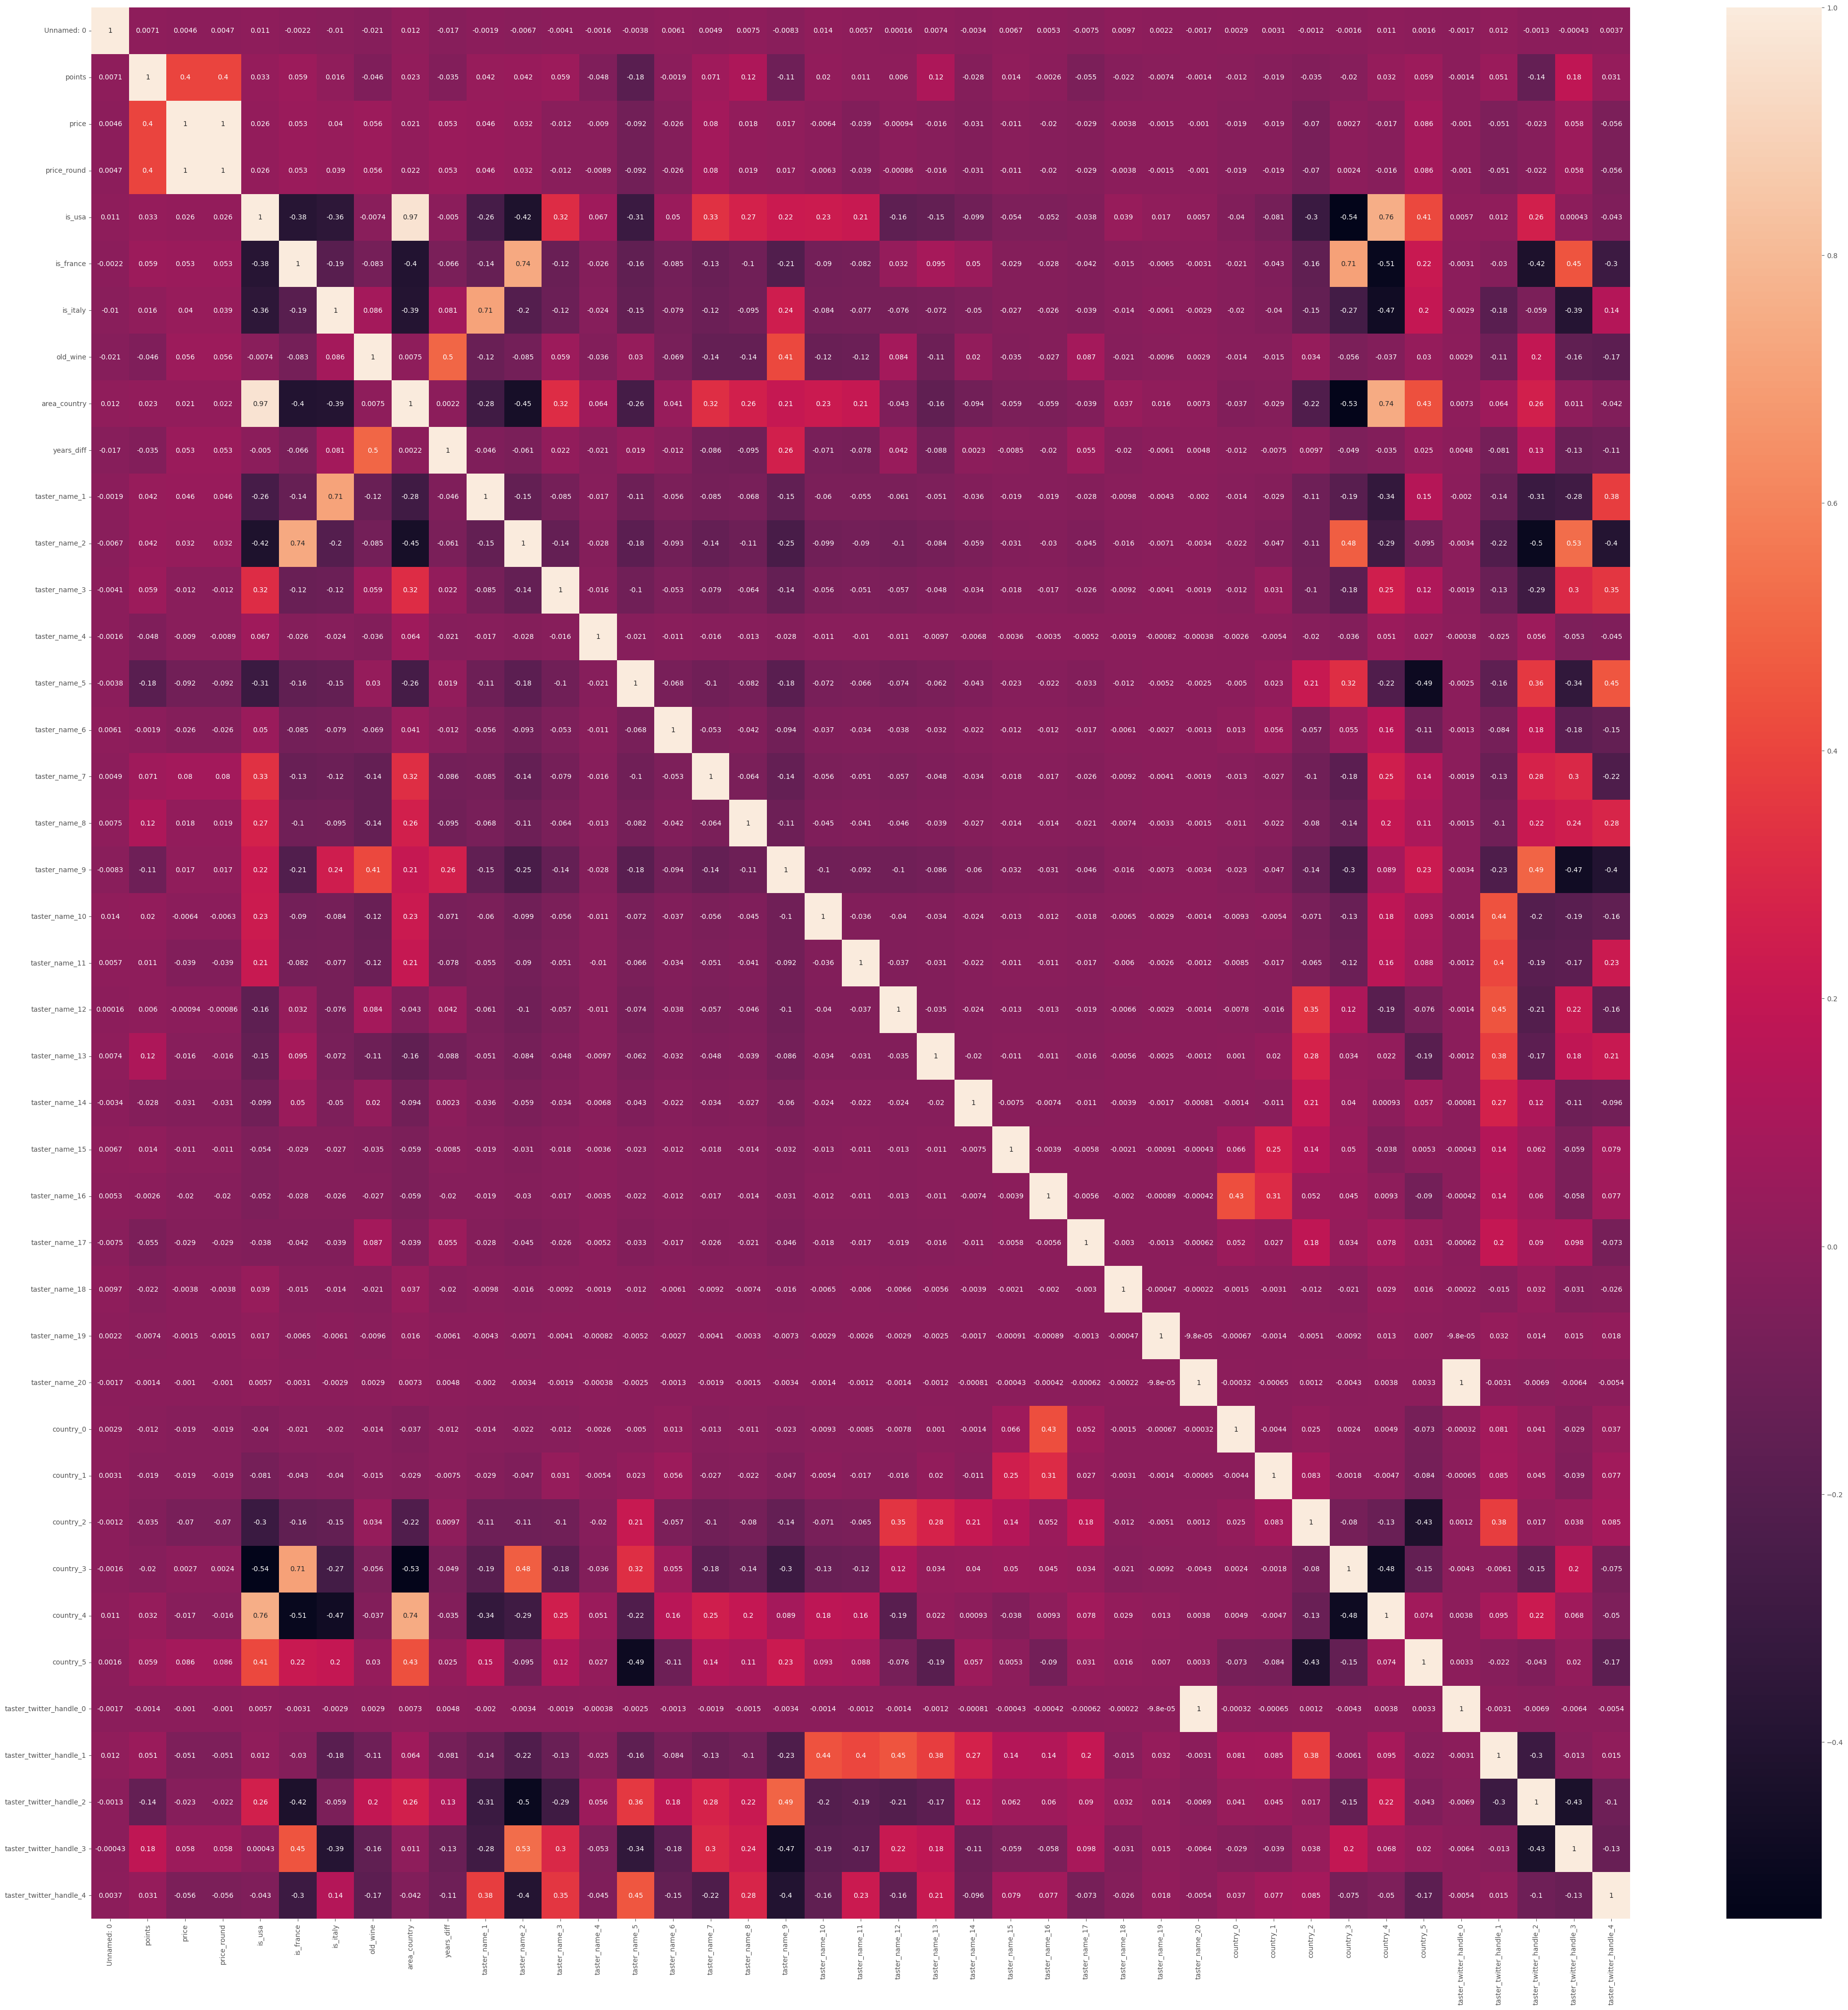

In [235]:
# Построим график
fig, (ax1) = plt.subplots(ncols=1, figsize=(50, 50))
sns.heatmap(wine_df.corr(numeric_only=True), annot=True, ax=ax1)

In [236]:
# Убираем
features_to_drop = ['price_round', 'is_usa', 'is_france', 'is_italy', 'area_country', 'taster_twitter_handle_0']

for name in features_to_drop:
    wine_df = wine_df.drop(name, axis=1)

<Axes: >

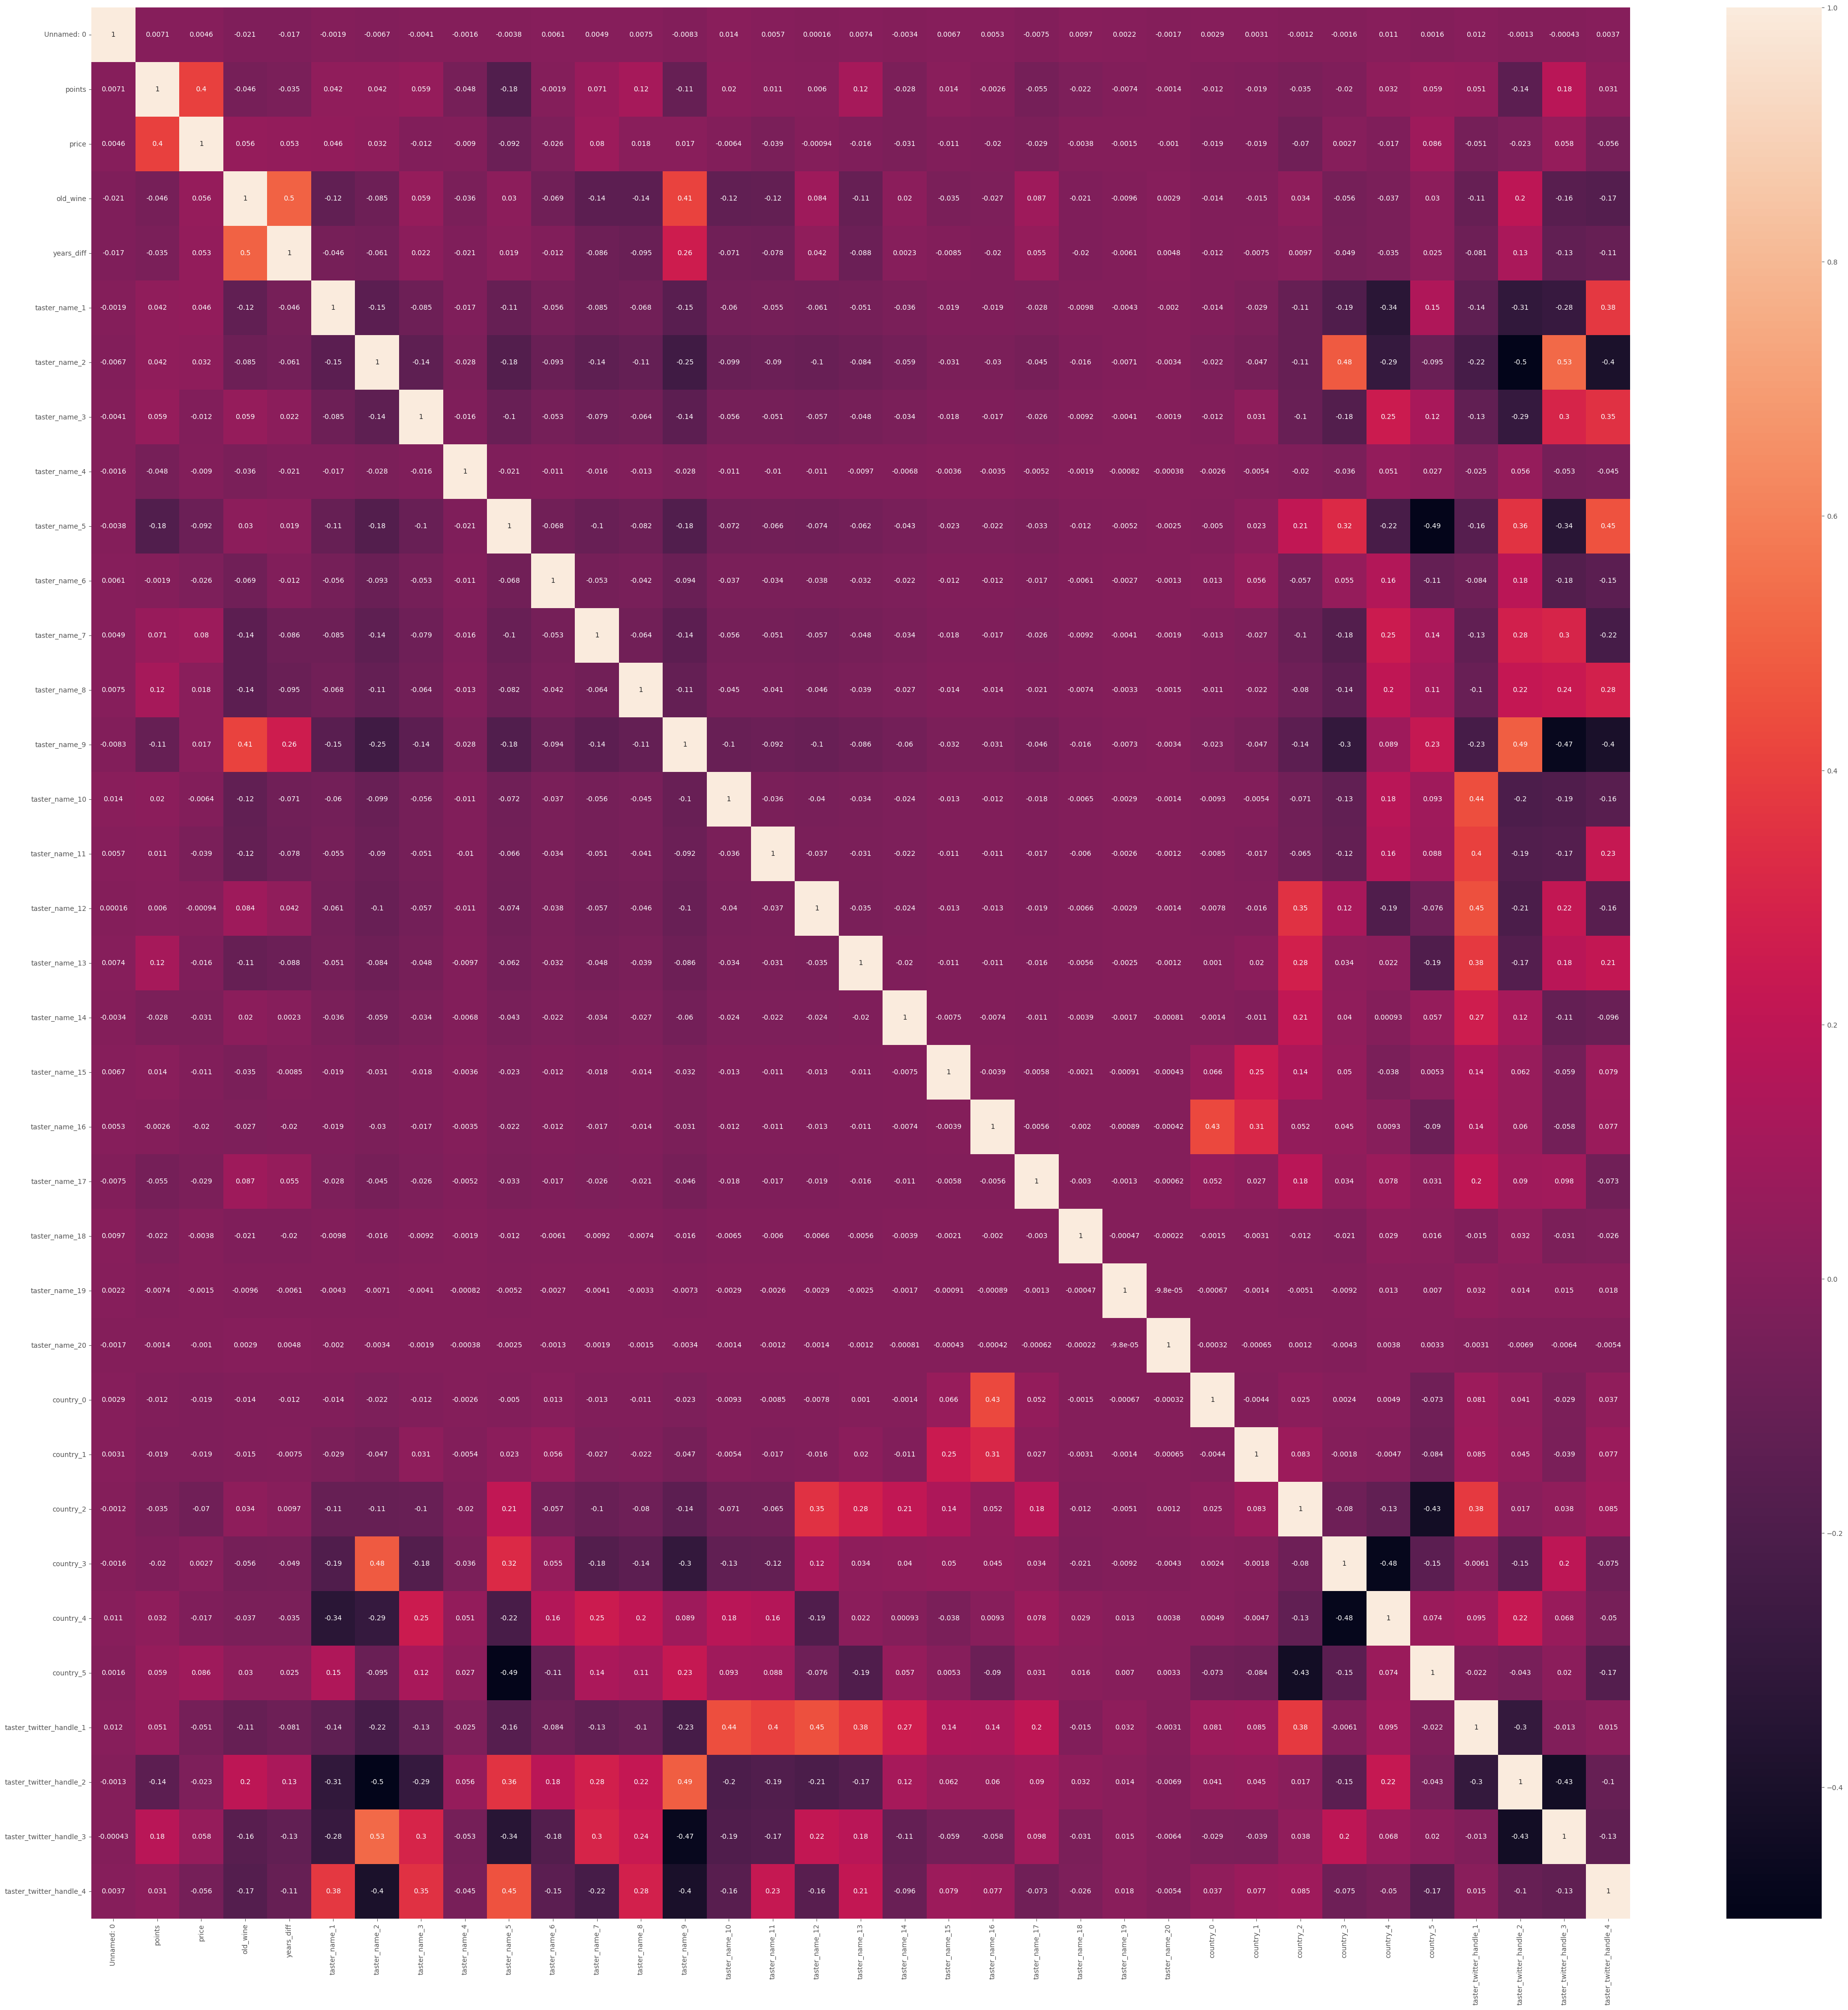

In [237]:
# Построим график
fig, (ax1) = plt.subplots(ncols=1, figsize=(50, 50))
sns.heatmap(wine_df.corr(numeric_only=True), annot=True, ax=ax1)